# Análise dos dados de matrícula de EM no RJ

## Objetivo
O objetivo da monografia é obter um modelo de predição da evasão escolar no EM  no Rio. Para isso, vamos utilizar 2 (três) bases do Censo Escolar (2018):

- Perfil dos estudantes (*TABELA DE MATRÍCULA*)
- Perfil das escolas (*TABELA DE ESCOLA*)

Nesse documento temos por objetivo explorar os dados de matrícula obtidos dos anos de 2015 a 2018.

## Importação dos dados e pacotes



In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

RAW_PATH = os.getcwd()+'/drive/My Drive/TCC EMAp/data/raw/'
MOD_PATH = os.getcwd()+'/drive/My Drive/TCC EMAp/data/wrangle/'
OUT_PATH = os.getcwd()+'/drive/My Drive/TCC EMAp/data/output/'

import pandas as pd
# matriculas_2015 = pd.read_csv(os.getcwd()+'/drive/My Drive/TCC EMAp//matriculas_rio_EM_2015.csv')
matriculas_2016 = pd.read_csv(RAW_PATH+'matriculas_rj_2016.csv')
matriculas_2017 = pd.read_csv(RAW_PATH+'matriculas_rj_2017.csv')
matriculas_2018 = pd.read_csv(RAW_PATH+'matriculas_rj_2018.csv')
# taxas_transicao = pd.read_excel(RAW_PATH+'TX_TRANSICAO_UF_2014_2015.xlsx', skiprows=5)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Motivação e Contexto

Segundo a última divulgação do INEP das taxas de transição escolares (2014-2015): 
- Rio de Janeiro ocupa a 11ª posição dentre os estados com maior taxa de evasão escolar no ensino médio, de 11,8%.
- É o estado com maior taxa de evasão na região sudeste
- O 1º ano do EM é a etapa onde tivemos maior nível de evasões (14.6%), 
- A taxa de evasão no ensino público é mais do que o dobro do privado, tanto no geral quanto para o 1º ano. Essa diferença cai nos anos seguintes, mas ainda é relevante.


In [0]:
taxas_transicao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 69 columns):
Ano                           138 non-null object
Região                        136 non-null object
Unidade da 
Federação         135 non-null object
Localização                   136 non-null object
Dependência Administrativa    136 non-null object
Taxa de Promoção              138 non-null object
Unnamed: 6                    137 non-null object
Unnamed: 7                    137 non-null object
Unnamed: 8                    137 non-null object
Unnamed: 9                    137 non-null object
Unnamed: 10                   137 non-null object
Unnamed: 11                   137 non-null object
Unnamed: 12                   137 non-null object
Unnamed: 13                   137 non-null object
Unnamed: 14                   137 non-null object
Unnamed: 15                   137 non-null object
Unnamed: 16                   137 non-null object
Unnamed: 17                   138 non-null ob

In [0]:
cols = taxas_transicao.columns
cols

Index(['Ano', 'Região', 'Unidade da \nFederação', 'Localização',
       'Dependência Administrativa', 'Taxa de Promoção', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Taxa de Repetência', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Taxa de Evasão', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Migração para EJA', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 

In [0]:
taxas_transicao = taxas_transicao[list(cols[0:5])+list(cols[37:53])]
taxas_transicao.columns

Index(['Ano', 'Região', 'Unidade da \nFederação', 'Localização',
       'Dependência Administrativa', 'Taxa de Evasão', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52'],
      dtype='object')

In [0]:
taxas_transicao.head()

,Ano,Região,Unidade da Federação,Localização,Dependência Administrativa,Taxa de Evasão,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,NaN,NaN,NaN,NaN,Ensino Fundamental,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ensino Médio,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Total,Anos Iniciais,Anos Finais,1º Ano,2º Ano,3º Ano,4º Ano,5º Ano,6º Ano,7º Ano,8º Ano,9º Ano,Total,1ª série,2ª série,3ª série
2,ANO,NO_CODIGO,NaN,TIPOLOCA,DEPENDAD,TXEVE_FUN,TXEVE_F14,TXEVE_F58,TXEVE_F00,TXEVE_F01,TXEVE_F02,TXEVE_F03,TXEVE_F04,TXEVE_F05,TXEVE_F06,TXEVE_F07,TXEVE_F08,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
3,2014/2015,Norte,Rondônia,Total,Total,3.1,1.5,5.4,1.1,1.4,1.4,1.5,2.3,4.6,4.6,5.1,7.7,9.8,11.3,10.3,6.5
4,2014/2015,Norte,Rondônia,Total,Pública,3.2,1.5,5.7,1.1,1.5,1.4,1.6,2.4,4.8,4.9,5.4,8.2,10.4,12,10.7,7


In [0]:
evasao_em_rj_2015 = taxas_transicao[list(cols[0:5])+list(cols[49:53])].copy()
evasao_em_rj_2015.head()

,Ano,Região,Unidade da Federação,Localização,Dependência Administrativa,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,NaN,NaN,NaN,NaN,Ensino Médio,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,Total,1ª série,2ª série,3ª série
2,ANO,NO_CODIGO,NaN,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
3,2014/2015,Norte,Rondônia,Total,Total,9.8,11.3,10.3,6.5
4,2014/2015,Norte,Rondônia,Total,Pública,10.4,12,10.7,7


In [0]:
evasao_em_rj_2015.columns = evasao_em_rj_2015.iloc[2].fillna('UF')
evasao_em_rj_2015 = evasao_em_rj_2015.drop([0,1,2])

evasao_em_rj_2015.head()

2,ANO,NO_CODIGO,UF,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
3,2014/2015,Norte,Rondônia,Total,Total,9.8,11.3,10.3,6.5
4,2014/2015,Norte,Rondônia,Total,Pública,10.4,12,10.7,7
5,2014/2015,Norte,Rondônia,Total,Privada,3.3,2.5,6.3,0.7
6,2014/2015,Norte,Rondônia,Urbana,Total,9.9,11.3,10.4,6.8
7,2014/2015,Norte,Rondônia,Rural,Total,9,10.7,10.6,3.5


#### Taxa de evasão no estado (setorizada)

In [0]:
evasao_em_rj_2015[evasao_em_rj_2015['UF'] == 'Rio de Janeiro']

2,ANO,NO_CODIGO,UF,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
93,2014/2015,Sudeste,Rio de Janeiro,Total,Total,11.8,14.6,13,5.8
94,2014/2015,Sudeste,Rio de Janeiro,Total,Pública,13.6,16.7,14.3,7
95,2014/2015,Sudeste,Rio de Janeiro,Total,Privada,5.8,6.6,8,2.1
96,2014/2015,Sudeste,Rio de Janeiro,Urbana,Total,11.8,14.6,13,5.8
97,2014/2015,Sudeste,Rio de Janeiro,Rural,Total,10.3,12.9,11.9,3.7


DEPENDAD,Total,Pública,Privada
TXEVE_M01,14.6,16.7,6.6
TXEVE_M02,13,14.3,8
TXEVE_M03,5.8,7,2.1


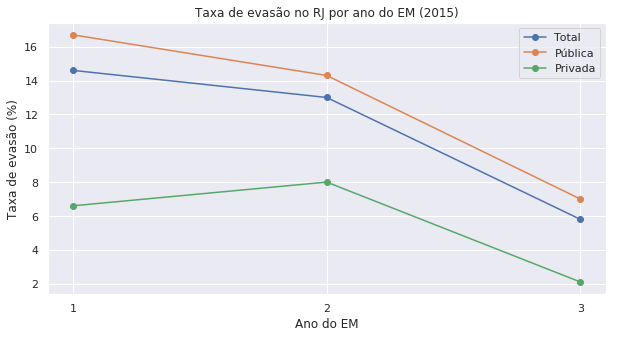

In [0]:
#plt.plot(evasao_em_rj_2015[evasao_em_rj_2015['UF'] == 'Rio de Janeiro'].iloc[93])
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

t = evasao_em_rj_2015[evasao_em_rj_2015['UF'] == 'Rio de Janeiro'][['DEPENDAD', 'TXEVE_M01', 'TXEVE_M02', 'TXEVE_M03']].loc[[93,94,95]].copy()
t.columns.name = None
t = t.set_index('DEPENDAD').transpose()

fig, ax = plt.subplots()
ax.plot([i[-1] for i in t.index], t.values, marker='o')
ax.legend(t.columns)
ax.set_title('Taxa de evasão no RJ por ano do EM (2015)')

plt.ylabel('Taxa de evasão (%)')
plt.xlabel('Ano do EM')


# for i, txt in enumerate(t.values):
#     ax.annotate(txt, (t.index[i], t.values[i]+0.2))

t

#sns.barplot(x='Pública', hue=t.index, data=t.transpose())
#plt.bar(t.transpose()['Pública'], )

#### Comparação com outros estados

In [0]:
# ranking evasão no ensino médio nos estados (geral)
evasao_em_rj_2015[(evasao_em_rj_2015['TIPOLOCA'] == 'Total') & (evasao_em_rj_2015['DEPENDAD'] == 'Total')].sort_values('TXEVE_MED', ascending=False).reset_index(drop=True)

2,ANO,NO_CODIGO,UF,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
0,2014/2015,Norte,Pará,Total,Total,15.9,16.3,17,14.1
1,2014/2015,Centro-Oeste,Mato Grosso,Total,Total,13.8,16.2,12,10.9
2,2014/2015,Nordeste,Alagoas,Total,Total,13.7,15.3,14.1,10.2
3,2014/2015,Nordeste,Piauí,Total,Total,13.2,15,15,7.9
4,2014/2015,Nordeste,Maranhão,Total,Total,13.1,14.5,15.1,8.3
5,2014/2015,Nordeste,R. G. do Norte,Total,Total,12.7,14.1,13,10
6,2014/2015,Nordeste,Bahia,Total,Total,12.6,14.1,13.6,9.2
7,2014/2015,Nordeste,Sergipe,Total,Total,12.6,14.2,13.5,8.4
8,2014/2015,Centro-Oeste,M. G. do Sul,Total,Total,12.4,14.6,13.1,7.3
9,2014/2015,Nordeste,Paraíba,Total,Total,12.4,14.5,14.2,6.3


In [0]:
# ranking evasão no ensino médio nos estados (pública geral)
evasao_UF_EM_2015 = evasao_em_rj_2015[(evasao_em_rj_2015['TIPOLOCA'] == 'Total') & (evasao_em_rj_2015['DEPENDAD'] == 'Pública')]

evasao_UF_EM_2015.sort_values('TXEVE_MED', ascending=False).reset_index(drop=True)

2,ANO,NO_CODIGO,UF,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
0,2014/2015,Norte,Pará,Total,Pública,17.2,17.4,18.2,15.6
1,2014/2015,Nordeste,Alagoas,Total,Pública,15,16.9,15.1,11.9
2,2014/2015,Centro-Oeste,Mato Grosso,Total,Pública,14.7,17.1,12.6,11.9
3,2014/2015,Nordeste,Sergipe,Total,Pública,14.4,16,15.2,10.1
4,2014/2015,Nordeste,Piauí,Total,Pública,14.2,16.2,15.7,9
5,2014/2015,Nordeste,R. G. do Norte,Total,Pública,14,15.8,14,11.3
6,2014/2015,Nordeste,Maranhão,Total,Pública,13.6,15,15.3,8.8
7,2014/2015,Sudeste,Rio de Janeiro,Total,Pública,13.6,16.7,14.3,7
8,2014/2015,Centro-Oeste,M. G. do Sul,Total,Pública,13.5,15.9,14.2,8.2
9,2014/2015,Nordeste,Bahia,Total,Pública,13.4,14.8,14.2,10


In [0]:
# ranking evasão no ensino médio nos estados (1o ano pública)
evasao_UF_EM_2015.sort_values('TXEVE_M01', ascending=False).reset_index(drop=True)

2,ANO,NO_CODIGO,UF,TIPOLOCA,DEPENDAD,TXEVE_MED,TXEVE_M01,TXEVE_M02,TXEVE_M03
0,2014/2015,Norte,Pará,Total,Pública,17.2,17.4,18.2,15.6
1,2014/2015,Centro-Oeste,Mato Grosso,Total,Pública,14.7,17.1,12.6,11.9
2,2014/2015,Nordeste,Alagoas,Total,Pública,15,16.9,15.1,11.9
3,2014/2015,Sudeste,Rio de Janeiro,Total,Pública,13.6,16.7,14.3,7
4,2014/2015,Nordeste,Piauí,Total,Pública,14.2,16.2,15.7,9
5,2014/2015,Sudeste,Espírito Santo,Total,Pública,12.8,16,12.9,6.6
6,2014/2015,Nordeste,Sergipe,Total,Pública,14.4,16,15.2,10.1
7,2014/2015,Sul,R. G. do Sul,Total,Pública,12.9,16,13.2,7.4
8,2014/2015,Nordeste,Paraíba,Total,Pública,13.2,15.9,14.3,7.2
9,2014/2015,Centro-Oeste,M. G. do Sul,Total,Pública,13.5,15.9,14.2,8.2


In [0]:
evasao_UF_EM_2015.to_csv(MOD_PATH+'evasao_uf_em_2015.csv')

In [0]:
matriculas_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571485 entries, 0 to 571484
Data columns (total 92 columns):
NU_ANO_CENSO                     571485 non-null int64
ID_MATRICULA                     571485 non-null int64
CO_PESSOA_FISICA                 571485 non-null int64
NU_DIA                           571485 non-null int64
NU_MES                           571485 non-null int64
NU_ANO                           571485 non-null int64
NU_IDADE_REFERENCIA              571485 non-null int64
NU_IDADE                         571485 non-null int64
NU_DURACAO_TURMA                 571485 non-null int64
NU_DUR_ATIV_COMP_MESMA_REDE      571485 non-null int64
NU_DUR_ATIV_COMP_OUTRAS_REDES    571485 non-null int64
NU_DUR_AEE_MESMA_REDE            571485 non-null int64
NU_DUR_AEE_OUTRAS_REDES          571485 non-null int64
NU_DIAS_ATIVIDADE                571485 non-null int64
TP_SEXO                          571485 non-null int64
TP_COR_RACA                      571485 non-null int64
TP_NACION

In [0]:
matriculas_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552292 entries, 0 to 552291
Data columns (total 92 columns):
NU_ANO_CENSO                     552292 non-null int64
ID_MATRICULA                     552292 non-null int64
CO_PESSOA_FISICA                 552292 non-null int64
NU_DIA                           552292 non-null int64
NU_MES                           552292 non-null int64
NU_ANO                           552292 non-null int64
NU_IDADE_REFERENCIA              552292 non-null int64
NU_IDADE                         552292 non-null int64
NU_DURACAO_TURMA                 552292 non-null int64
NU_DUR_ATIV_COMP_MESMA_REDE      552292 non-null int64
NU_DUR_ATIV_COMP_OUTRAS_REDES    552292 non-null int64
NU_DUR_AEE_MESMA_REDE            552292 non-null int64
NU_DUR_AEE_OUTRAS_REDES          552292 non-null int64
NU_DIAS_ATIVIDADE                552292 non-null int64
TP_SEXO                          552292 non-null int64
TP_COR_RACA                      552292 non-null int64
TP_NACION

In [0]:
matriculas_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551637 entries, 0 to 551636
Data columns (total 92 columns):
NU_ANO_CENSO                     551637 non-null int64
ID_ALUNO                         551637 non-null object
ID_MATRICULA                     551637 non-null int64
NU_DIA                           551637 non-null int64
NU_MES                           551637 non-null int64
NU_ANO                           551637 non-null int64
NU_IDADE_REFERENCIA              551637 non-null int64
NU_IDADE                         551637 non-null int64
NU_DURACAO_TURMA                 551637 non-null int64
NU_DUR_ATIV_COMP_MESMA_REDE      551637 non-null int64
NU_DUR_ATIV_COMP_OUTRAS_REDES    551637 non-null int64
NU_DUR_AEE_MESMA_REDE            551637 non-null int64
NU_DUR_AEE_OUTRAS_REDES          551637 non-null int64
NU_DIAS_ATIVIDADE                551637 non-null int64
TP_SEXO                          551637 non-null int64
TP_COR_RACA                      551637 non-null int64
TP_NACIO

In [0]:
matriculas_2016['NEW_ID_ALUNO'] = matriculas_2016[['CO_PESSOA_FISICA', 'CO_MUNICIPIO_NASC']].applymap(hash)

In [0]:
matriculas_2016['CO_PESSOA_FISICA'].value_counts()[:20]

114123381587    2
110029660431    2
114960643306    2
111754323269    2
116408651363    2
119012753960    2
115444401540    2
112293673730    2
121211240044    2
113280988500    2
113641726742    2
113036612920    2
122117799301    2
112293899119    2
113990418008    2
110730217778    2
111828809674    2
116683952743    2
110093093828    2
117090356093    2
Name: CO_PESSOA_FISICA, dtype: int64

In [0]:
matriculas_2016['NEW_ID_ALUNO'].value_counts()[:20]

114123381587    2
110029660431    2
114960643306    2
111754323269    2
116408651363    2
119012753960    2
115444401540    2
112293673730    2
121211240044    2
113280988500    2
113641726742    2
113036612920    2
122117799301    2
112293899119    2
113990418008    2
110730217778    2
111828809674    2
116683952743    2
110093093828    2
117090356093    2
Name: NEW_ID_ALUNO, dtype: int64

## Etapa de ensino

Pelos dicionários de dados no ANEXO I das respectivas bases, a numeração se mantém a mesma nos 3 anos.

In [0]:
dicio_path = os.getcwd()+'/drive/My Drive/TCC EMAp/files/dados info 2018/ANEXOS/ANEXO I - Dicion†rio de Dados e Tabelas Auxiliares/Dicion†rio de Dados da Educaá∆o B†sica.xlsx'
etapas = pd.read_excel(dicio_path, sheet_name='Tabela Etapa de Ensino', skiprows=5)

In [0]:
etapas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 17 columns):
Código                                52 non-null float64
Nome Etapa                            52 non-null object
Coleta por ano ("s"=sim;"-"=não )     53 non-null object
Unnamed: 3                            53 non-null object
Unnamed: 4                            53 non-null object
Unnamed: 5                            53 non-null object
Unnamed: 6                            53 non-null object
Unnamed: 7                            53 non-null object
Unnamed: 8                            53 non-null object
Unnamed: 9                            53 non-null object
Unnamed: 10                           53 non-null object
Unnamed: 11                           53 non-null object
Unnamed: 12                           53 non-null object
Unnamed: 13                           53 non-null object
Unnamed: 14                           0 non-null float64
Unnamed: 15                           0 n

In [0]:
etapas.head()

,Código,Nome Etapa,"Coleta por ano (""s""=sim;""-""=não )",Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,NaN,07,08,09,10,11,12,13,14,15,16,17,18,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Educação Infantil - Creche (0 a 3 anos),s,s,s,s,s,s,s,s,s,s,s,s,NaN,NaN,NaN
3,2.0,Educação Infantil - Pré-escola (4 e 5 anos),s,s,s,s,s,s,s,s,s,s,s,s,NaN,NaN,NaN
4,3.0,Educação Infantil - Unificada (0 a 5 anos),s,s,s,s,s,s,s,s,s,s,s,s,NaN,NaN,NaN


In [0]:
# removendo colunas sem info
cols = etapas.columns
etapas = etapas[cols[:-3]]
etapas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
Código                                52 non-null float64
Nome Etapa                            52 non-null object
Coleta por ano ("s"=sim;"-"=não )     53 non-null object
Unnamed: 3                            53 non-null object
Unnamed: 4                            53 non-null object
Unnamed: 5                            53 non-null object
Unnamed: 6                            53 non-null object
Unnamed: 7                            53 non-null object
Unnamed: 8                            53 non-null object
Unnamed: 9                            53 non-null object
Unnamed: 10                           53 non-null object
Unnamed: 11                           53 non-null object
Unnamed: 12                           53 non-null object
Unnamed: 13                           53 non-null object
dtypes: float64(1), object(13)
memory usage: 6.2+ KB


In [0]:
# renomeando colunas de coleta
cols = etapas.columns
new_cols = list(cols[:2])+['coleta_{}'.format(i) for i in etapas.iloc[0].dropna()]
etapas.columns = new_cols

In [0]:
etapas = etapas.drop([0,1], axis=0).reset_index(drop=True)
etapas.head()

,Código,Nome Etapa,coleta_07,coleta_08,coleta_09,coleta_10,coleta_11,coleta_12,coleta_13,coleta_14,coleta_15,coleta_16,coleta_17,coleta_18
0,1.0,Educação Infantil - Creche (0 a 3 anos),s,s,s,s,s,s,s,s,s,s,s,s
1,2.0,Educação Infantil - Pré-escola (4 e 5 anos),s,s,s,s,s,s,s,s,s,s,s,s
2,3.0,Educação Infantil - Unificada (0 a 5 anos),s,s,s,s,s,s,s,s,s,s,s,s
3,4.0,Ensino Fundamental de 8 anos - 1ª Série,s,s,s,s,s,s,s,s,s,s,s,s
4,5.0,Ensino Fundamental de 8 anos - 2ª Série,s,s,s,s,s,s,s,s,s,s,s,s


In [0]:
etapas_EM = etapas[etapas['Código'].isin(matriculas_2018['TP_ETAPA_ENSINO'])]
etapas_EM

,Código,Nome Etapa,coleta_07,coleta_08,coleta_09,coleta_10,coleta_11,coleta_12,coleta_13,coleta_14,coleta_15,coleta_16,coleta_17,coleta_18
24,25.0,Ensino Médio - 1ª Série,s,s,s,s,s,s,s,s,s,s,s,s
25,26.0,Ensino Médio - 2ª Série,s,s,s,s,s,s,s,s,s,s,s,s
26,27.0,Ensino Médio - 3ª Série,s,s,s,s,s,s,s,s,s,s,s,s
27,28.0,Ensino Médio - 4ª Série,s,s,s,s,s,s,s,s,s,s,s,s
28,29.0,Ensino Médio - Não Seriada,s,s,s,s,s,s,s,s,s,s,s,s
29,30.0,Curso Técnico Integrado (Ensino Médio Integrad...,s,s,s,s,s,s,s,s,s,s,s,s
30,31.0,Curso Técnico Integrado (Ensino Médio Integrad...,s,s,s,s,s,s,s,s,s,s,s,s
31,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,s,s,s,s,s,s,s,s,s,s,s,s
32,33.0,Curso Técnico Integrado (Ensino Médio Integrad...,s,s,s,s,s,s,s,s,s,s,s,s
33,34.0,Curso Técnico Integrado (Ensino Médio Integrad...,s,s,s,s,s,s,s,s,s,s,s,s


In [0]:
matriculas_2016 = matriculas_2016.merge(etapas_EM[['Código', 'Nome Etapa']], 
                                        left_on='TP_ETAPA_ENSINO', 
                                        right_on='Código')

matriculas_2017 = matriculas_2017.merge(etapas_EM[['Código', 'Nome Etapa']], 
                                        left_on='TP_ETAPA_ENSINO', 
                                        right_on='Código')

matriculas_2018 = matriculas_2018.merge(etapas_EM[['Código', 'Nome Etapa']], 
                                        left_on='TP_ETAPA_ENSINO', 
                                        right_on='Código')

## Checagens

### Identificação única

#### ID_MATRICULA: Não constante

Deve ser a mesma ao longo dos anos

- `ID_MATRICULA` varia entre os anos (ver mais em [2017](#Matrículas-2017))

In [0]:
# t1 = matriculas_2018[matriculas_2018['TP_TIPO_TURMA'].isin([4,5]) == False]
matriculas_2017['TP_TIPO_TURMA'].value_counts()

0    552152
2       140
Name: TP_TIPO_TURMA, dtype: int64

In [0]:
# verificando id_matricula 2017 -> 2018
t1 = matriculas_2018[matriculas_2018['ID_MATRICULA'].isin(matriculas_2017['ID_MATRICULA'])]
t1['Nome Etapa'].value_counts()

Ensino Médio - 2ª Série                                         21486
Ensino Médio - 3ª Série                                         20314
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série        3603
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série        3140
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série         977
Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série         731
Ensino Médio - 1ª Série                                           599
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada      190
Ensino Médio - Não Seriada                                        139
Ensino Médio - 4ª Série                                             1
Name: Nome Etapa, dtype: int64

In [0]:
t1['Nome Etapa'].value_counts()/matriculas_2018['Nome Etapa'].value_counts()

Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série       0.078224
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série       0.492781
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série       0.524149
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série       0.837189
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada    0.037977
Ensino Médio - 1ª Série                                         0.002827
Ensino Médio - 2ª Série                                         0.127231
Ensino Médio - 3ª Série                                         0.143934
Ensino Médio - 4ª Série                                         0.250000
Ensino Médio - Não Seriada                                      0.144041
Name: Nome Etapa, dtype: float64

In [0]:
# verificando id_matricula 2016 -> 2017
t = matriculas_2017[matriculas_2017['ID_MATRICULA'].isin(matriculas_2016['ID_MATRICULA'])]
t['Nome Etapa'].value_counts()

Ensino Médio - 2ª Série                                         22276
Ensino Médio - 3ª Série                                         21221
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série        4022
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série        3660
Ensino Médio - 1ª Série                                           941
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série         609
Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série         479
Ensino Médio - Não Seriada                                        104
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada       85
Name: Nome Etapa, dtype: int64

In [0]:
t['Nome Etapa'].value_counts()/matriculas_2017['Nome Etapa'].value_counts()

Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série       0.064364
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série       0.508470
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série       0.550790
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série       0.820755
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada    0.017551
Ensino Médio - 1ª Série                                         0.004408
Ensino Médio - 2ª Série                                         0.133489
Ensino Médio - 3ª Série                                         0.148033
Ensino Médio - 4ª Série                                              NaN
Ensino Médio - Não Seriada                                      0.105691
Name: Nome Etapa, dtype: float64

* Se o `ID_MATRICULA` se mantivesse ao longo dos anos, a taxa de renovação de alunos, no EM 2a e EM 3a série seria muito alta (menos de 20% das matrículas são as mesmas). Vamos testar se isso é verdadeiro verificando pelo `CO_PESSOA_FISICA`:

 * Resultado: 84% dos alunos do EM 2a série em 2017 estão na base de 2016! Logo, o campo `ID_MATRICULA` não é único por ano.

In [0]:
test = matriculas_2017[matriculas_2017['Nome Etapa'] == 'Ensino Médio - 2ª Série']
test = test[['CO_PESSOA_FISICA', 'Nome Etapa']].set_index('CO_PESSOA_FISICA', drop=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166875 entries, 112659126886 to 169121741599
Data columns (total 1 columns):
Nome Etapa    166875 non-null object
dtypes: object(1)
memory usage: 2.5+ MB


In [0]:
test = test.join(matriculas_2016[['CO_PESSOA_FISICA', 'Nome Etapa']].set_index('CO_PESSOA_FISICA', drop=True), 
                 how='left', lsuffix='_2017', rsuffix='_2016')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167060 entries, 110003579297 to 176756868020
Data columns (total 2 columns):
Nome Etapa_2017    167060 non-null object
Nome Etapa_2016    144200 non-null object
dtypes: object(2)
memory usage: 3.8+ MB


In [0]:
test.head()

,Nome Etapa_2017,Nome Etapa_2016
CO_PESSOA_FISICA,,
110003579297,Ensino Médio - 2ª Série,Ensino Médio - 1ª Série
110008747376,Ensino Médio - 2ª Série,Ensino Médio - 1ª Série
110009165966,Ensino Médio - 2ª Série,Ensino Médio - 1ª Série
110009351590,Ensino Médio - 2ª Série,Ensino Médio - 1ª Série
110011195842,Ensino Médio - 2ª Série,NaN


In [0]:
test1 = test.reset_index().groupby(['Nome Etapa_2017', 'Nome Etapa_2016']).count()
test1

CO_PESSOA_FISICA
Nome Etapa_2017         Nome Etapa_2016                                                     
Ensino Médio - 2ª Série Curso Técnico Integrado (Ensino Médio Integrado...               700
                        Curso Técnico Integrado (Ensino Médio Integrado...               127
                        Curso Técnico Integrado (Ensino Médio Integrado...                 1
                        Curso Técnico Integrado (Ensino Médio Integrado...                62
                        Ensino Médio - 1ª Série                                       128943
                        Ensino Médio - 2ª Série                                        14274
                        Ensino Médio - 3ª Série                                           21
                        Ensino Médio - Não Seriada                                        72

In [0]:
test1/len(test)

CO_PESSOA_FISICA
Nome Etapa_2017         Nome Etapa_2016                                                     
Ensino Médio - 2ª Série Curso Técnico Integrado (Ensino Médio Integrado...          0.004190
                        Curso Técnico Integrado (Ensino Médio Integrado...          0.000760
                        Curso Técnico Integrado (Ensino Médio Integrado...          0.000006
                        Curso Técnico Integrado (Ensino Médio Integrado...          0.000371
                        Ensino Médio - 1ª Série                                     0.771836
                        Ensino Médio - 2ª Série                                     0.085442
                        Ensino Médio - 3ª Série                                     0.000126
                        Ensino Médio - Não Seriada                                  0.000431

In [0]:
sum(test1['CO_PESSOA_FISICA']/len(test))

0.8631629354722854

#### CO_PESSOA_FISICA: Mudança em 2018

Até 2017, o campo de identificação única d@ alun@ era `CO_PESSOA_FISICA`. Isso mudou em 2018: passou para `ID_ALUNO` de forma a não conter informação pessoal d@s alun@s.

In [0]:
v = matriculas_2016['CO_PESSOA_FISICA'].value_counts()
print('Percentual de alun@s únic@s:', 100 - 100*len(v[v > 1])/len(v))

duplicado_2016 = v[v> 1].index

Percentual de alun@s únic@s: 99.87964218515131


In [0]:
matriculas_2016[matriculas_2016['CO_PESSOA_FISICA'] == v[v > 1].index[0]]

,NU_ANO_CENSO,ID_MATRICULA,CO_PESSOA_FISICA,NU_DIA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_VANS_KOMBI,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_BICICLETA,IN_TRANSP_TR_ANIMAL,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,IN_TRANSP_TREM_METRO,IN_NECESSIDADE_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,...,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_BRAILLE,IN_RECURSO_AMPLIADA_16,IN_RECURSO_AMPLIADA_20,IN_RECURSO_AMPLIADA_24,IN_RECURSO_NENHUM,TP_INGRESSO_FEDERAIS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,TP_ETAPA_ENSINO,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_UNIFICADA,TP_TIPO_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,Código,Nome Etapa
97358,2016,210038922,110029689332,10,2,1999,17,17,590,0,0,0,0,5,2,0,1,76,33.0,3304557.0,33.0,3304557.0,1,3,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,25,8285062,NaN,0,0,33136475,3,3306,33018,33,3304557,330455705,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,25.0,Ensino Médio - 1ª Série
329545,2016,210038921,110029689332,10,2,1999,17,17,270,0,0,0,0,5,2,0,1,76,33.0,3304557.0,33.0,3304557.0,1,3,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,26,8285059,NaN,0,0,33136475,3,3306,33018,33,3304557,330455705,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,26.0,Ensino Médio - 2ª Série


In [0]:
v = matriculas_2017['CO_PESSOA_FISICA'].value_counts()
print('Percentual de alun@s únic@s:', 100 - 100*len(v[v > 1])/len(v))

duplicado_2017 = v[v> 1].index

Percentual de alun@s únic@s: 99.94003199501414


In [0]:
v = matriculas_2018['ID_ALUNO'].value_counts()
100*len(v[v > 1])/len(v)

duplicado_2018 = v[v> 1].index

In [0]:
matriculas_2018[matriculas_2018['ID_ALUNO'] == v[v > 1].index[0]]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_DIA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_VANS_KOMBI,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_BICICLETA,IN_TRANSP_TR_ANIMAL,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,IN_TRANSP_TREM_METRO,IN_NECESSIDADE_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,...,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_BRAILLE,IN_RECURSO_AMPLIADA_16,IN_RECURSO_AMPLIADA_20,IN_RECURSO_AMPLIADA_24,IN_RECURSO_NENHUM,TP_INGRESSO_FEDERAIS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,TP_ETAPA_ENSINO,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_UNIFICADA,TP_TIPO_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,Código,Nome Etapa
17875,2018,7761F23B8D56AF260734575306C3DB7B,287546693,19,5,2001,17,17,320,0,0,0,0,6,2,1,1,76,33.0,3304557.0,NaN,NaN,1,3,1,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,0,1,0,1,30,248343,6080.0,0,0,33067643,3,3306,33018,33,3304557,330455705,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,30.0,Curso Técnico Integrado (Ensino Médio Integrad...
379794,2018,7761F23B8D56AF260734575306C3DB7B,298018720,19,5,2001,17,17,315,0,0,0,0,5,2,1,1,76,33.0,3304557.0,NaN,NaN,1,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0,26,12969784,NaN,0,0,33071969,3,3306,33018,33,3304557,330455705,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,26.0,Ensino Médio - 2ª Série


- `CO_PESSOA_FISISCA`-> `ID_ALUNO` em 2018: não existe de-para!

In [0]:
set(matriculas_2018.columns) - set(matriculas_2017.columns)

{'ID_ALUNO'}

In [0]:
set(matriculas_2017.columns) - set(matriculas_2018.columns)

{'CO_PESSOA_FISICA'}

In [0]:
set(matriculas_2017.columns) - set(matriculas_2016.columns)

set()

In [0]:
set(matriculas_2018.columns) - set(matriculas_2016.columns)

{'ID_ALUNO'}

In [0]:
matriculas_2018[matriculas_2018['ID_ALUNO'].isin(matriculas_2017['CO_PESSOA_FISICA'])]

,NU_ANO_CENSO,ID_ALUNO,ID_MATRICULA,NU_DIA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_VANS_KOMBI,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_BICICLETA,IN_TRANSP_TR_ANIMAL,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,IN_TRANSP_TREM_METRO,IN_NECESSIDADE_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,...,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_BRAILLE,IN_RECURSO_AMPLIADA_16,IN_RECURSO_AMPLIADA_20,IN_RECURSO_AMPLIADA_24,IN_RECURSO_NENHUM,TP_INGRESSO_FEDERAIS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,TP_ETAPA_ENSINO,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_UNIFICADA,TP_TIPO_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,Código,Nome Etapa


### Indentificação das escolas

#### CO_ENTIDADE - OK

Esperamos que esse número de idenficação seja único, ou seja, tenha um variação muito pequena ao longos dos anos (no caaso de escolas serem criadas/fechadas).


In [0]:
escolas_17 = matriculas_2017['CO_ENTIDADE'].unique()
len(escolas_17)

2252

In [0]:
escolas_16 = matriculas_2016['CO_ENTIDADE'].unique()
len(escolas_16)

2223

In [0]:
# Escolas que surgiram
len(set(escolas_17) - set(escolas_16))

95

In [0]:
# Escolas que fecharam
len(set(escolas_16) - set(escolas_17))

66

### Identificação das turmas

In [0]:
matriculas_2016[['CO_ENTIDADE', 'Nome Etapa']].drop_duplicates()['CO_ENTIDADE'].value_counts()[:10]

33067252    6
33052808    6
33169438    6
33081743    6
33071829    6
33040125    6
33130426    6
33064644    6
33045518    6
33145326    6
Name: CO_ENTIDADE, dtype: int64

Text(0.5, 1.0, 'Distribuição do número de etapas de ensino (EM) por escola')

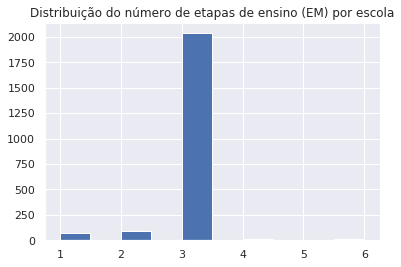

In [0]:
matriculas_2016[['CO_ENTIDADE', 'Nome Etapa']].drop_duplicates()['CO_ENTIDADE'].value_counts().hist()
plt.title('Distribuição do número de etapas de ensino (EM) por escola')

In [0]:
t = matriculas_2016[['CO_ENTIDADE', 'Nome Etapa']].drop_duplicates()
v = t['CO_ENTIDADE'].value_counts()
v[v>3]

t[t['CO_ENTIDADE'] == 33067252]

,CO_ENTIDADE,Nome Etapa
285,33067252,Curso Técnico Integrado (Ensino Médio Integrad...
10295,33067252,Curso Técnico Integrado (Ensino Médio Integrad...
18257,33067252,Curso Técnico Integrado (Ensino Médio Integrad...
38423,33067252,Ensino Médio - 1ª Série
265052,33067252,Ensino Médio - 2ª Série
437798,33067252,Ensino Médio - 3ª Série


## Análises

### Matrículas 2018

#### Taxa de permanência

- Não é possível medir a taxa de permanência de 2017 para 2018 com `ID_MATRICULA`


In [0]:
t1 = matriculas_2018[matriculas_2018['ID_MATRICULA'].isin(matriculas_2017['ID_MATRICULA'])]
t1['Nome Etapa'].value_counts()

Ensino Médio - 2ª Série                                         21486
Ensino Médio - 3ª Série                                         20314
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série        3603
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série        3140
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série         977
Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série         731
Ensino Médio - 1ª Série                                           599
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada      190
Ensino Médio - Não Seriada                                        139
Ensino Médio - 4ª Série                                             1
Name: Nome Etapa, dtype: int64

In [0]:
matriculas_2018['Nome Etapa'].value_counts()

Ensino Médio - 1ª Série                                         211899
Ensino Médio - 2ª Série                                         168874
Ensino Médio - 3ª Série                                         141134
Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série         9345
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série         6874
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série         6372
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada      5003
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série         1167
Ensino Médio - Não Seriada                                         965
Ensino Médio - 4ª Série                                              4
Name: Nome Etapa, dtype: int64

In [0]:
t1['Nome Etapa'].value_counts()/matriculas_2018['Nome Etapa'].value_counts()

Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série       0.078224
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série       0.492781
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série       0.524149
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série       0.837189
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada    0.037977
Ensino Médio - 1ª Série                                         0.002827
Ensino Médio - 2ª Série                                         0.127231
Ensino Médio - 3ª Série                                         0.143934
Ensino Médio - 4ª Série                                         0.250000
Ensino Médio - Não Seriada                                      0.144041
Name: Nome Etapa, dtype: float64

In [0]:
t2 = t1[['ID_MATRICULA', 'Código', 'Nome Etapa']].copy()
t2 = t2.set_index('ID_MATRICULA')
t2.columns = ['{}_2018'.format(i) for i in t2.columns]

In [0]:
t3 = matriculas_2017[matriculas_2017['ID_MATRICULA'].isin(t2.index)][['ID_MATRICULA', 
                                                                      'Código', 
                                                                      'Nome Etapa']]
t3 = t3.set_index('ID_MATRICULA')
t3.columns = ['{}_2017'.format(i) for i in t3.columns]

In [0]:
t4 = t3.join(t2)
t4.head()

,Código_2017,Nome Etapa_2017,Código_2018,Nome Etapa_2018
ID_MATRICULA,,,,
112714907,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,32.0,Curso Técnico Integrado (Ensino Médio Integrad...
230050529,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,32.0,Curso Técnico Integrado (Ensino Médio Integrad...
265742730,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,32.0,Curso Técnico Integrado (Ensino Médio Integrad...
213507004,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,32.0,Curso Técnico Integrado (Ensino Médio Integrad...
107075699,32.0,Curso Técnico Integrado (Ensino Médio Integrad...,32.0,Curso Técnico Integrado (Ensino Médio Integrad...


In [0]:
t4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51180 entries, 112714907 to 265771418
Data columns (total 4 columns):
Código_2017        51180 non-null float64
Nome Etapa_2017    51180 non-null object
Código_2018        51180 non-null float64
Nome Etapa_2018    51180 non-null object
dtypes: float64(2), object(2)
memory usage: 4.5+ MB


In [0]:
len(t4[t4['Código_2017'] < t4['Código_2018']])

47937

In [0]:
len(t4[t4['Código_2017'] == t4['Código_2018']])

3006

In [0]:
t5 = t4[t4['Código_2017'] > t4['Código_2018']].reset_index()
t5.groupby(['Código_2017', 'Nome Etapa_2017', 'Código_2018', 'Nome Etapa_2018']).count()

ID_MATRICULA
Código_2017 Nome Etapa_2017                                    Código_2018 Nome Etapa_2018                                                 
29.0        Ensino Médio - Não Seriada                         26.0        Ensino Médio - 2ª Série                                       17
30.0        Curso Técnico Integrado (Ensino Médio Integrado... 25.0        Ensino Médio - 1ª Série                                       17
                                                               26.0        Ensino Médio - 2ª Série                                       60
31.0        Curso Técnico Integrado (Ensino Médio Integrado... 26.0        Ensino Médio - 2ª Série                                        7
                                                               27.0        Ensino Médio - 3ª Série                                       65
32.0        Curso Técnico Integrado (Ensino Médio Integrado... 27.0        Ensino Médio - 3ª Série                                        1
                                                               30.0        Curso Técnico Integrado (Ensino Médio Integrado...             1
                                                               31.0        Curso Técnico Integrado (Ensino Médio Integrado...            45
33.0        Curso Técnico Integrado (Ensino Médio Integrado... 31.0        Curso Técnico Integrado (Ensino Médio Integrado...            17
34.0        Curso Técnico Integrado (Ensino Médio Integrado... 29.0        Ensino Médio - Não Seriada                                     7

- Fluxos estranhos
 - EM 3a técnico (32) -> EM 2a técnico (31) 
 - EM 4a técnico (33) -> EM 2a técnico (31) 

### Matrículas 2017

#### Taxa de permanência (geral)

- % de alunos que continuaram de 2016 para 2017 (OBS: % no 1º ano deve indicar repetência)

In [0]:
t6 = matriculas_2017[matriculas_2017['CO_PESSOA_FISICA'].isin(matriculas_2016['CO_PESSOA_FISICA'])]
t6['Nome Etapa'].value_counts()

Ensino Médio - 2ª Série                                         144015
Ensino Médio - 3ª Série                                         128605
Ensino Médio - 1ª Série                                          31043
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série         7454
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série         6387
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada      3939
Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série         1700
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série          711
Ensino Médio - Não Seriada                                         320
Name: Nome Etapa, dtype: int64

In [0]:
t6['Nome Etapa'].value_counts()/matriculas_2017['Nome Etapa'].value_counts()

Curso Técnico Integrado (Ensino Médio Integrado) 1ª Série       0.228433
Curso Técnico Integrado (Ensino Médio Integrado) 2ª Série       0.942351
Curso Técnico Integrado (Ensino Médio Integrado) 3ª Série       0.961174
Curso Técnico Integrado (Ensino Médio Integrado) 4ª Série       0.958221
Curso Técnico Integrado (Ensino Médio Integrado) Não Seriada    0.813339
Ensino Médio - 1ª Série                                         0.145408
Ensino Médio - 2ª Série                                         0.863011
Ensino Médio - 3ª Série                                         0.897121
Ensino Médio - 4ª Série                                              NaN
Ensino Médio - Não Seriada                                      0.325203
Name: Nome Etapa, dtype: float64

In [0]:
t7 = t6[['CO_PESSOA_FISICA', 'ID_MATRICULA', 'Nome Etapa', 'CO_ENTIDADE']].copy()
t7 = t7.set_index('CO_PESSOA_FISICA')

t8 = matriculas_2016[['CO_PESSOA_FISICA', 'ID_MATRICULA', 'Nome Etapa', 'CO_ENTIDADE']].copy()
t8 = t8.set_index('CO_PESSOA_FISICA')

In [0]:
t8 = t7.join(t8, how='inner', lsuffix='_2017', rsuffix='_2016')
t8.head()

,ID_MATRICULA_2017,Nome Etapa_2017,CO_ENTIDADE_2017,ID_MATRICULA_2016,Nome Etapa_2016,CO_ENTIDADE_2016
CO_PESSOA_FISICA,,,,,,
110002564725,246790367,Ensino Médio - 3ª Série,33128618,210021163,Ensino Médio - 2ª Série,33128618
110002955759,225914660,Ensino Médio - 3ª Série,33067856,187953842,Ensino Médio - 2ª Série,33114340
110003579297,235499029,Ensino Médio - 2ª Série,33447217,214494738,Ensino Médio - 1ª Série,33447217
110006171302,257958434,Ensino Médio - 1ª Série,33132879,211210614,Ensino Médio - 2ª Série,33132879
110006339009,257902795,Ensino Médio - 1ª Série,33069026,211261300,Ensino Médio - 1ª Série,33069026


In [0]:
t8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324670 entries, 110002564725 to 145877467629
Data columns (total 6 columns):
ID_MATRICULA_2017    324670 non-null int64
Nome Etapa_2017      324670 non-null object
CO_ENTIDADE_2017     324670 non-null int64
ID_MATRICULA_2016    324670 non-null int64
Nome Etapa_2016      324670 non-null object
CO_ENTIDADE_2016     324670 non-null int64
dtypes: int64(4), object(2)
memory usage: 17.3+ MB


Por que tem alun@s pulando/voltando de etapa de ensino?

In [0]:
t8[['Nome Etapa_2016', 'Nome Etapa_2017']].reset_index().groupby(['Nome Etapa_2016', 'Nome Etapa_2017']).count()

CO_PESSOA_FISICA
Nome Etapa_2016                                    Nome Etapa_2017                                                     
Curso Técnico Integrado (Ensino Médio Integrado... Curso Técnico Integrado (Ensino Médio Integrado...              1224
                                                   Curso Técnico Integrado (Ensino Médio Integrado...              6315
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                11
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                70
                                                   Ensino Médio - 1ª Série                                          509
                                                   Ensino Médio - 2ª Série                                          700
                                                   Ensino Médio - 3ª Série                                           37
                                                   Ensino Médio - Não Seriada                                         2
Curso Técnico Integrado (Ensino Médio Integrado... Curso Técnico Integrado (Ensino Médio Integrado...                 4
                                                   Curso Técnico Integrado (Ensino Médio Integrado...               635
                                                   Curso Técnico Integrado (Ensino Médio Integrado...              5962
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                45
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                35
                                                   Ensino Médio - 1ª Série                                           10
                                                   Ensino Médio - 2ª Série                                          127
                                                   Ensino Médio - 3ª Série                                          398
                                                   Ensino Médio - Não Seriada                                         1
Curso Técnico Integrado (Ensino Médio Integrado... Curso Técnico Integrado (Ensino Médio Integrado...                 1
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                38
                                                   Curso Técnico Integrado (Ensino Médio Integrado...               372
                                                   Curso Técnico Integrado (Ensino Médio Integrado...               432
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                14
                                                   Ensino Médio - 1ª Série                                            1
                                                   Ensino Médio - 2ª Série                                            1
                                                   Ensino Médio - 3ª Série                                           30
Curso Técnico Integrado (Ensino Médio Integrado... Curso Técnico Integrado (Ensino Médio Integrado...                14
                                                   Curso Técnico Integrado (Ensino Médio Integrado...               234
Curso Técnico Integrado (Ensino Médio Integrado... Curso Técnico Integrado (Ensino Médio Integrado...                 4
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                 2
                                                   Curso Técnico Integrado (Ensino Médio Integrado...                 2
...                                                                                                                 ...
                                                   Ensino Médio - Não Seriada                                        13
Ensino Médio - 1ª Série

In [0]:
# quant@s alun@s permaneceram?
len(t8)

324670

In [0]:
# quant@s mudaram de escola?
len(t8[t8['CO_ENTIDADE_2017'] != t8['CO_ENTIDADE_2016']])

50475

In [0]:
# quant@s têm a mesma matrícula?
len(t8[t8['ID_MATRICULA_2017'] == t8['ID_MATRICULA_2016']])

52994

In [0]:
# pode haver duplicada de CPF + escola + etapa (repetência), mas não ID_TURMA
matriculas_2017[matriculas_2017[['CO_PESSOA_FISICA', 'TP_ETAPA_ENSINO', 'CO_ENTIDADE', 'ID_TURMA']].duplicated()]

,NU_ANO_CENSO,ID_MATRICULA,CO_PESSOA_FISICA,NU_DIA,NU_MES,NU_ANO,NU_IDADE_REFERENCIA,NU_IDADE,NU_DURACAO_TURMA,NU_DUR_ATIV_COMP_MESMA_REDE,NU_DUR_ATIV_COMP_OUTRAS_REDES,NU_DUR_AEE_MESMA_REDE,NU_DUR_AEE_OUTRAS_REDES,NU_DIAS_ATIVIDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASC,CO_MUNICIPIO_NASC,CO_UF_END,CO_MUNICIPIO_END,TP_ZONA_RESIDENCIAL,TP_OUTRO_LOCAL_AULA,IN_TRANSPORTE_PUBLICO,TP_RESPONSAVEL_TRANSPORTE,IN_TRANSP_VANS_KOMBI,IN_TRANSP_MICRO_ONIBUS,IN_TRANSP_ONIBUS,IN_TRANSP_BICICLETA,IN_TRANSP_TR_ANIMAL,IN_TRANSP_OUTRO_VEICULO,IN_TRANSP_EMBAR_ATE5,IN_TRANSP_EMBAR_5A15,IN_TRANSP_EMBAR_15A35,IN_TRANSP_EMBAR_35,IN_TRANSP_TREM_METRO,IN_NECESSIDADE_ESPECIAL,IN_CEGUEIRA,IN_BAIXA_VISAO,...,IN_RECURSO_LIBRAS,IN_RECURSO_LABIAL,IN_RECURSO_BRAILLE,IN_RECURSO_AMPLIADA_16,IN_RECURSO_AMPLIADA_20,IN_RECURSO_AMPLIADA_24,IN_RECURSO_NENHUM,TP_INGRESSO_FEDERAIS,TP_MEDIACAO_DIDATICO_PEDAGO,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,TP_ETAPA_ENSINO,ID_TURMA,CO_CURSO_EDUC_PROFISSIONAL,TP_UNIFICADA,TP_TIPO_TURMA,CO_ENTIDADE,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_LOCALIZACAO_DIFERENCIADA,IN_EDUCACAO_INDIGENA,Código,Nome Etapa


## GERAÇÃO DA BASE DE FLUXO 2016-2017

In [0]:
# vou manter somente @s alun@s que são únicos (99,9%) e estadual (DEP = 2)
alunes_2016_EM1 = matriculas_2016[matriculas_2016['CO_PESSOA_FISICA'].isin(duplicado_2016) == False]
alunes_2016_EM1 = alunes_2016_EM1[(alunes_2016_EM1['Nome Etapa'] == 'Ensino Médio - 1ª Série') & (alunes_2016_EM1['TP_DEPENDENCIA'] == 2)]
len(alunes_2016_EM1)

178662

In [0]:
alunes_2016_EM1.to_csv(MOD_PATH+'alunes_2016_EM1.csv')

In [0]:
charset "ISO-8859-1".